# Project Summary

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import time
from datetime import datetime

from game import Game, Player
from utils import investigate_game
from utils.investigate_game import InvestigateGame
from players.random_player import RandomPlayer
from players.min_max import MinMaxPlayer, AlphaBetaMinMaxPlayer
from players.monte_carlo_rl import MonteCarloRLPlayer
from players.monte_carlo_tree_search import MCTSPlayer
from players.human_player import HumanPlayer

import sys

# needed to load Seralized Monte Carlo RL Player
sys.modules['investigate_game'] = investigate_game

In [13]:
def plot_training_stats(
    rewards: list, state_value_dict_size: int, step_size: int, switch_ratio: int | None = None
) -> None:
    """
    Given a training list of rewards and the size of the player's State-Value dictionary,
    this function plots the averages of the rewards using a given step size.

    Args:
        rewards: the rewards achieved during training time;
        state_value_dict_size: the length of the State-Value dictionary of the player;
        step: the step size to be used to plot an average value;
        switch_ratio: define the moment in which minmax started playing-

    Returns:
        None.
    """

    # https://stackoverflow.com/questions/15956309/averaging-over-every-n-elements-of-a-numpy-array
    # compute the averages
    averages = np.mean(np.array(rewards).reshape(-1, step_size), axis=1)

    # define the width and height of the figure in inches
    plt.figure(figsize=(10, 5))
    # plot the averages
    plt.plot(averages, color='red', marker='o', linestyle='dashed', label='Training')
    # if minmax played
    if switch_ratio is not None:
        # compute the exact moment
        switch_moment = int(len(rewards) / step_size * switch_ratio)
        # print a vertical line at the moment minmax started playing
        plt.axvline(x=switch_moment, color='green', label='MinMax Starts Playing')
    # specify the title
    plt.title('Training Summary')
    # specify the x-axis label
    plt.xlabel('# of the step')
    # specify the y-axis label
    plt.ylabel('Mean rewards value')
    # show the legend
    plt.legend()
    # add information text
    plt.text(
        500,
        0,
        f'Number of visited states: {state_value_dict_size}',
        color="white",
        bbox=dict(facecolor='red', boxstyle='round,pad=0.3,rounding_size=0.2'),
        ha='right',
        va='top',
    )
    # show the plot
    plt.show()

## Monte Carlo Reinforcement learning player

To train a Reinforcement Learning player based on a Monte Carlo technique, we used a method referred as [**Temporal Difference learning (TD)**](https://en.wikipedia.org/wiki/Temporal_difference_learning#Mathematical_formulation). In short, the training is performed in such a way that the _State-Value_ function is updated as follows:
$$
V(S_{t})\leftarrow (1-\alpha )V(S_{t})+\underbrace {\alpha } _{\text{learning rate}}[\overbrace {R_{t+1}+\gamma V(S_{t+1})} ^{\text{The TD target}}]
$$
where $S_{t}$ is the state at time $t$, $\gamma$ is the discount rate and $R_{t+1}$ is the reward at time $t+1$.


### Show the training

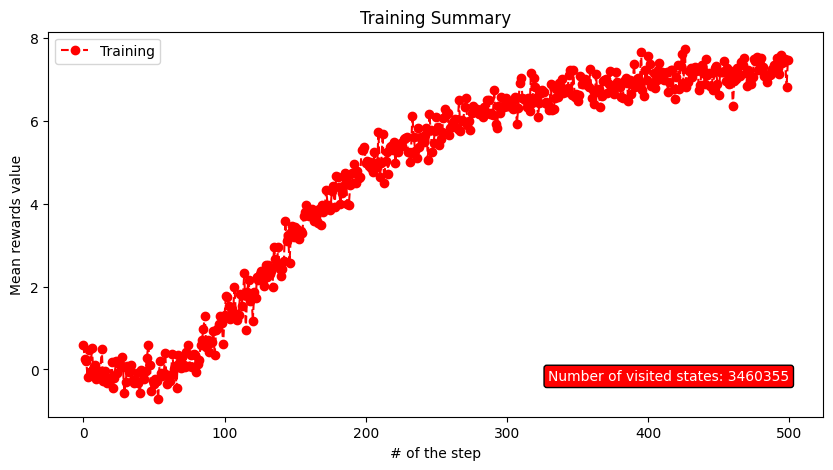

In [14]:
monte_carlo_rl_player = MonteCarloRLPlayer()
monte_carlo_rl_player.load('trained_agents/monte_carlo_rl.pkl')
plot_training_stats(monte_carlo_rl_player.rewards, len(monte_carlo_rl_player._state_values), step_size=1_000)

Considering the above plot, we can see that the player is able to learn because of the implemented symmetries. Without the symmetries, the number of states is too large and the player would need a huge amount of matches to achieve the same learning performance.

## Train MinMax

In [2]:
minmax_player = MinMaxPlayer(depth=3, enhance=True)
minmax_player.train(n_games=100)
minmax_player.save('trained_agents/minmax_depth3_player.pkl')

  0%|          | 0/100 [00:00<?, ?it/s]

Found states: 5,262,427: 100%|██████████| 100/100 [22:58<00:00, 13.78s/it]


New found states after 100 games: 5,262,427


## Train AlphaBetaMinMax

In [3]:
alphabeta_minmax_player = AlphaBetaMinMaxPlayer(depth=4, enhance=True)
alphabeta_minmax_player.train(n_games=20)
alphabeta_minmax_player.save('trained_agents/alphabeta_minmax_depth4_player')

Found states: 3,467,383: 100%|██████████| 20/20 [27:21<00:00, 82.05s/it]


New found states after 20 games: 3,467,383


## View Games

In [4]:
# create the first player
player1 = MinMaxPlayer()
# create the second player
player2 = RandomPlayer()
# create a new game
game = InvestigateGame(Game())
# LET'S BATTLE
winner = game.play(player1, player2, max_steps_draw=10)

-- BEGINNING OF THE GAME --
⬜️⬜️⬜️⬜️⬜️
⬜️⬜️⬜️⬜️⬜️
⬜️⬜️⬜️⬜️⬜️
⬜️⬜️⬜️⬜️⬜️
⬜️⬜️⬜️⬜️⬜️
Player ❌ chose to move (0, 1) to the top
❌⬜️⬜️⬜️⬜️
⬜️⬜️⬜️⬜️⬜️
⬜️⬜️⬜️⬜️⬜️
⬜️⬜️⬜️⬜️⬜️
⬜️⬜️⬜️⬜️⬜️
Player ⭕️ chose to move (2, 4) to the right
❌⬜️⬜️⬜️⬜️
⬜️⬜️⬜️⬜️⬜️
⬜️⬜️⬜️⬜️⬜️
⬜️⬜️⬜️⬜️⬜️
⬜️⬜️⬜️⬜️⭕️
Player ❌ chose to move (0, 1) to the bottom
❌⬜️⬜️⬜️⬜️
⬜️⬜️⬜️⬜️⬜️
⬜️⬜️⬜️⬜️⬜️
⬜️⬜️⬜️⬜️⬜️
❌⬜️⬜️⬜️⭕️
Player ⭕️ chose to move (0, 1) to the top
⭕️⬜️⬜️⬜️⬜️
❌⬜️⬜️⬜️⬜️
⬜️⬜️⬜️⬜️⬜️
⬜️⬜️⬜️⬜️⬜️
❌⬜️⬜️⬜️⭕️
Player ❌ chose to move (4, 0) to the left
❌⭕️⬜️⬜️⬜️
❌⬜️⬜️⬜️⬜️
⬜️⬜️⬜️⬜️⬜️
⬜️⬜️⬜️⬜️⬜️
❌⬜️⬜️⬜️⭕️
Player ⭕️ chose to move (3, 0) to the right
❌⭕️⬜️⬜️⭕️
❌⬜️⬜️⬜️⬜️
⬜️⬜️⬜️⬜️⬜️
⬜️⬜️⬜️⬜️⬜️
❌⬜️⬜️⬜️⭕️
Player ❌ chose to move (0, 2) to the top
❌⭕️⬜️⬜️⭕️
❌⬜️⬜️⬜️⬜️
❌⬜️⬜️⬜️⬜️
⬜️⬜️⬜️⬜️⬜️
❌⬜️⬜️⬜️⭕️
Player ⭕️ chose to move (0, 3) to the bottom
❌⭕️⬜️⬜️⭕️
❌⬜️⬜️⬜️⬜️
❌⬜️⬜️⬜️⬜️
❌⬜️⬜️⬜️⬜️
⭕️⬜️⬜️⬜️⭕️
Player ❌ chose to move (2, 4) to the left
❌⭕️⬜️⬜️⭕️
❌⬜️⬜️⬜️⬜️
❌⬜️⬜️⬜️⬜️
❌⬜️⬜️⬜️⬜️
❌⭕️⬜️⬜️⭕️
Winner: Player 0
-- END OF THE GAME --


## Play Games

In [ ]:
# create the human player
human_player = HumanPlayer()

# create a mtcs player
monte_carlo_tree_search = MCTSPlayer(n_simulations=500, random=True)

# start the game
g = InvestigateGame(Game())
g.play(human_player, monte_carlo_tree_search, max_steps_draw=5)

## Testing Players performance

In [4]:
def show_game_statistics(player1: Player, player2: Player, n_games: int) -> None:
    """
    Play a few games between two players and plot the calculated winning percentages.

    Args:
        players1: the first player;
        players2: the second player;
        n_games: how many games to play.

    Returns:
        None.
    """

    # define the width and height of the figure in inches
    plt.figure(figsize=(8, 5))

    # let the players play both first and second
    for plot, (player1, player2) in enumerate([(player1, player2), (player2, player1)]):
        # count how many wins for the first player
        player1_wins = 0

        # for each game
        for _ in range(n_games):
            # create the game
            game = Game()
            # play the game
            winner = game.play(player1, player2)
            # if the first player wins
            if winner == 0:
                # increment the counter
                player1_wins += 1

        # create a subplot
        plt.subplot(1, 2, plot + 1)
        # plot the first player wins
        bars = plt.bar([0, 0.6], [player1_wins, n_games - player1_wins], color=['royalblue', 'lightcoral'], width=0.4)
        # for each bar
        for bar in bars:
            # get the winning percentage
            percentage = bar.get_height() / n_games
            # write the percentage on top of the bar
            plt.text(
                bar.get_x() + bar.get_width() / 2,
                bar.get_height(),
                f'{percentage:.2%}',
                ha='center',
                va='bottom',
                fontsize='medium',
            )
        # plot the players' names
        plt.xticks([0, 0.6], [player1.__class__.__name__, player2.__class__.__name__])
        # delete y-axis ticks and labels
        plt.tick_params(left=False, labelleft=False)
        # specify the y-axis label
        plt.ylabel('Wins')
        # specify the title shared between the subplots
        plt.title(
            f'{player1.__class__.__name__.replace("Player","")} VS {player2.__class__.__name__.replace("Player","")}',
            fontsize=10,
        )

    # specify the title shared between the subplots
    plt.suptitle(f'Summary of {n_games} games')

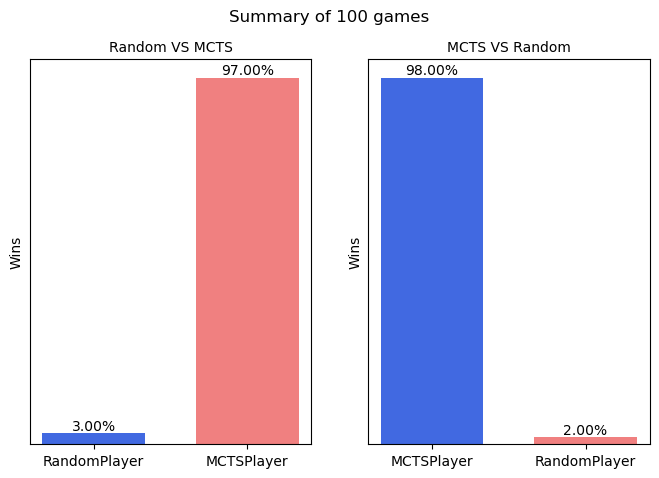

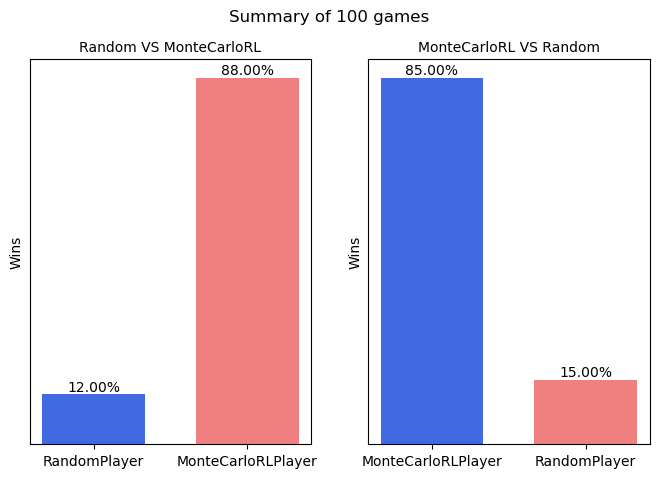

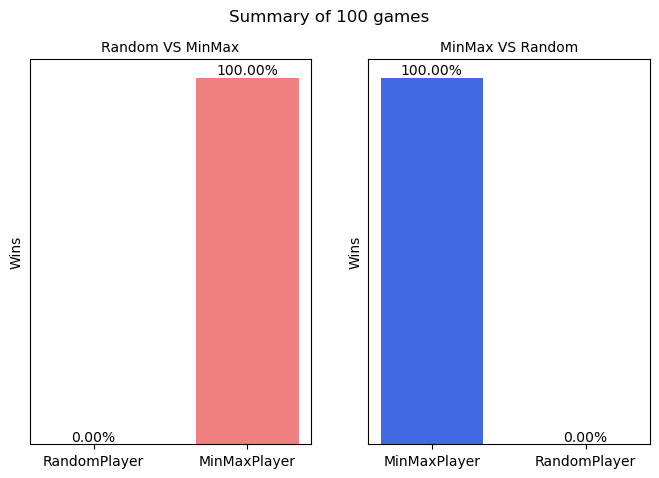

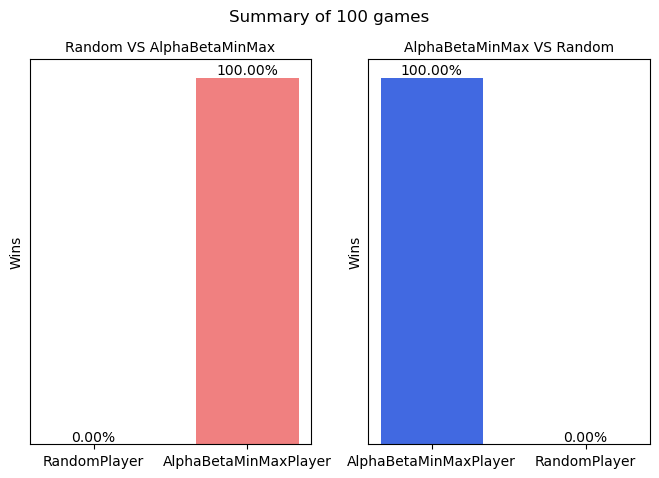

In [10]:
show_game_statistics(RandomPlayer(), MCTSPlayer(n_simulations=500, random=True), 100)
show_game_statistics(RandomPlayer(), monte_carlo_rl_player, 100)
show_game_statistics(RandomPlayer(), MinMaxPlayer(depth=3, enhance=True), 100)
show_game_statistics(RandomPlayer(), AlphaBetaMinMaxPlayer(depth=3, enhance=True), 100)

## Testing MinMax implementations

In [4]:
def show_minmax_statistics(player: MinMaxPlayer, minute: bool = False) -> None:
    """
    Play two games between the minmax player and a player that play randomly, and plot the duration time
    of the game with different optimizations.

    Args:
        player: a minmax player to test.

    Returns:
        None.
    """

    # define the width and height of the figure in inches
    plt.figure(figsize=(8, 5))

    # list to collect the duration time
    data = []

    # for each optimization
    for label, (flag1, flag2) in {
        'Hash table': (False, False),
        'Parallization': (True, False),
        'Symmetries': (False, True),
        'Parallization\n&\nSymmetries': (True, True),
        'Nothing': (False, False),
    }.items():
        # set the flags
        player.parallelize(flag1)
        player._symmetries = flag2
        # create the game
        game = Game()
        # keep track of the start time
        start = time.time()
        # play the game
        game.play(player, RandomPlayer())
        # create the game
        game = Game()
        # play the game
        game.play(RandomPlayer(), player)
        # get the total time of a match
        total_time = (time.time() - start) / 2
        # append the data to plot
        data.append((label, total_time))

    # split labels and values
    labels, values = zip(*sorted(data, key=lambda x: x[1]))
    # plot the results
    bars = plt.bar(labels, values, color=['deepskyblue'], width=0.5)
    # for each bar
    for i, bar in enumerate(bars):
        # write the game duration on top of the bar
        plt.text(
            bar.get_x() + bar.get_width() / 2,
            bar.get_height(),
            (datetime.strftime(datetime.utcfromtimestamp(values[i]), "%Mm %Ss %f")[:-3] + "ms")
            .replace('00m ', '')
            .replace('00s ', '')
            .replace(' 000ms', ''),
            ha='center',
            va='bottom',
            fontsize='medium',
        )

    # delete y-axis ticks and labels
    plt.tick_params(left=False, labelleft=False)
    # specify the y-axis label
    plt.ylabel('Time')
    # specify the title
    plt.title(f'How long does a game last?')
    # add margins to the plot
    plt.margins(y=0.2)
    # add information text
    plt.text(
        -0.35,
        values[-1] * (1.16),
        f'{player.__class__.__name__} at depth {player._depth} VS RandomPlayer',
        color="white",
        bbox=dict(facecolor='steelblue', boxstyle='round,pad=0.3,rounding_size=0.2'),
        ha='left',
        va='top',
    )
    # show the plot
    plt.show()

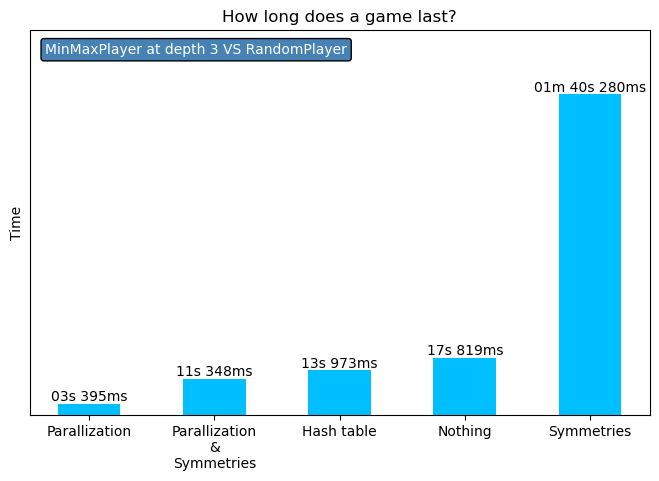

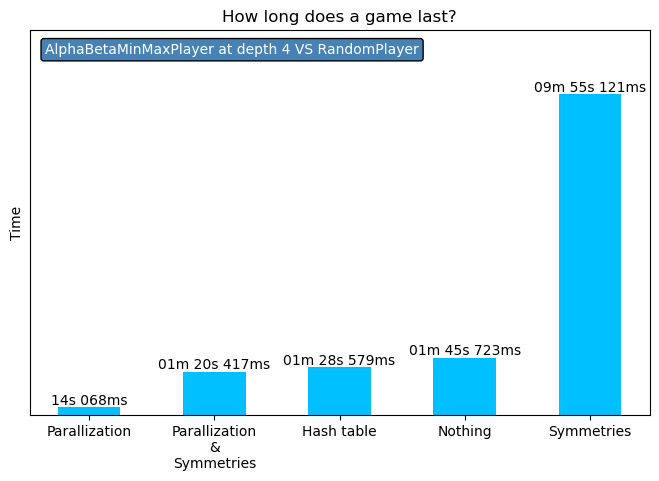

In [5]:
minmax_player = MinMaxPlayer()
minmax_player.load('trained_agents/minmax_depth3_player.pkl')
alphabeta_minmax_player = AlphaBetaMinMaxPlayer()
alphabeta_minmax_player.load('trained_agents/alphabeta_minmax_depth4_player.pkl')
show_minmax_statistics(minmax_player)
show_minmax_statistics(alphabeta_minmax_player)

As can be seen from the results, parallelization of the first level of the MinMax search tree leads to the best results. Against our expectations, however, symmetries do not produce time improvements, but worsen the overall performance of the players.